In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla
from functools import partial

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

## Build a function that generates some other shape

In [25]:
def generate_elipse(r1,r2,npoints=1000):
    'Generates the set of points in the grid closest to an elipse with radii r1 and r2 and the angle of the normal vector.'
    theta = np.linspace(0, 2*np.pi, npoints)
    x = r1*np.cos(theta)
    y = r2*np.sin(theta)
    phi = np.arctan((r1/r2)*np.tan(theta))
    z = np.exp(1j*phi)

    boundary_points, indices = np.unique(np.round(np.stack((x, y))), axis = 1, return_inverse=True)

    # Calculate the sum of elements in b that correspond to the same value in mask
    sums_real = np.bincount(indices, weights=z.real)
    sums_imag = np.bincount(indices, weights=z.imag)
    
    # Calculate the count of elements in b that correspond to the same value in mask
    counts = np.bincount(indices)
    
    # Calculate the average of elements in b that correspond to the same value in mask
    normal_angles = np.angle((sums_real + 1j*sums_imag)/counts)
    

    
    return boundary_points, normal_angles

/tmp/ipykernel_30987/828742761.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


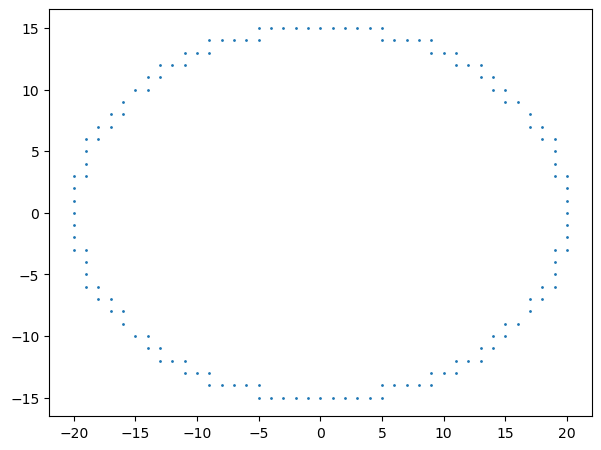

In [26]:
boundary_points, normal_angles = generate_elipse(20,15)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(boundary_points[0],boundary_points[1], s = 1)

ax.set_aspect('equal')
fig.show()

In [27]:
print(normal_angles)

[ 2.61488457e-01  1.79400593e-01  8.79265733e-02 -4.58793926e-16
 -8.79265733e-02 -1.79400593e-01 -2.61488457e-01  4.93746519e-01
  4.40128730e-01  3.50006063e-01  3.02047029e-01 -3.02047029e-01
 -3.50006063e-01 -4.40128730e-01 -4.93746519e-01  6.00813284e-01
  5.34905800e-01 -5.34905800e-01 -6.00813284e-01  6.95863642e-01
  6.43720540e-01 -6.43720540e-01 -6.95863642e-01  7.86448510e-01
  7.40193910e-01 -7.40193910e-01 -7.86448510e-01  8.66475948e-01
 -8.66475948e-01  9.43002336e-01  9.09845080e-01 -9.09845080e-01
 -9.43002336e-01  1.01913427e+00  9.90239132e-01 -9.90239132e-01
 -1.01913427e+00  1.05589115e+00 -1.05589115e+00  1.12471084e+00
  1.09751358e+00 -1.09751358e+00 -1.12471084e+00  1.16211124e+00
 -1.16211124e+00  1.22731297e+00  1.20406595e+00 -1.20406595e+00
 -1.22731297e+00  1.25533475e+00 -1.25533475e+00  1.29806461e+00
 -1.29806461e+00  1.33764558e+00 -1.33764558e+00  1.38883247e+00
  1.36700025e+00 -1.36700025e+00 -1.38883247e+00  1.42014141e+00
 -1.42014141e+00  1.45838